<a href="https://colab.research.google.com/github/cppel/data/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%9610_%D0%9F%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B8%D1%81%D1%82%D0%BE%D1%80%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D1%85_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_%D0%B8_%D0%B2%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_%D0%BF%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%BE%D0%B2_%D0%BD%D0%B0_%D0%BA%D0%B0%D1%80%D1%82%D0%BE%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1

- **Используя известные нам методы машинного обучения, спрогнозируйте изменение динамики ряда данных, используя соответствующий датасет из предыдущей работы (численность насерения, показатель ВВП, средней продолжительности жизни и т.д).**

- **Визуализируйте прогноз на интерактивной картограмме (см. прошлую работу)**

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

# набор данных
gapminder = px.data.gapminder()
gapminder.head() # получение первых 5 фрагментов данных

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [ ]:
gapminder

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


In [ ]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
 6   iso_alpha  1704 non-null   object 
 7   iso_num    1704 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 106.6+ KB


In [ ]:
# Countries with Highest Life Expectancy
lifeexp_data_demo = gapminder.groupby('country', as_index=False)['lifeExp'].mean()
lifeexp_data_demo.sort_values(by = 'lifeExp', ascending=False).head(10)

,country,lifeExp
57,Iceland,76.511417
122,Sweden,76.177000
95,Norway,75.843000
90,Netherlands,75.648500
123,Switzerland,75.565083
20,Canada,74.902750
66,Japan,74.826917
5,Australia,74.662917
34,Denmark,74.370167
44,France,74.348917


In [ ]:
# Countries with Lowest Life Expectancy
lifeexp_data_demo.sort_values(by = 'lifeExp', ascending=True).head(10)

,country,lifeExp
112,Sierra Leone,36.769167
0,Afghanistan,37.478833
3,Angola,37.883500
52,Guinea-Bissau,39.210250
86,Mozambique,40.379500
116,Somalia,40.988667
107,Rwanda,41.481583
74,Liberia,42.476250
40,Equatorial Guinea,42.960000
51,Guinea,43.239833


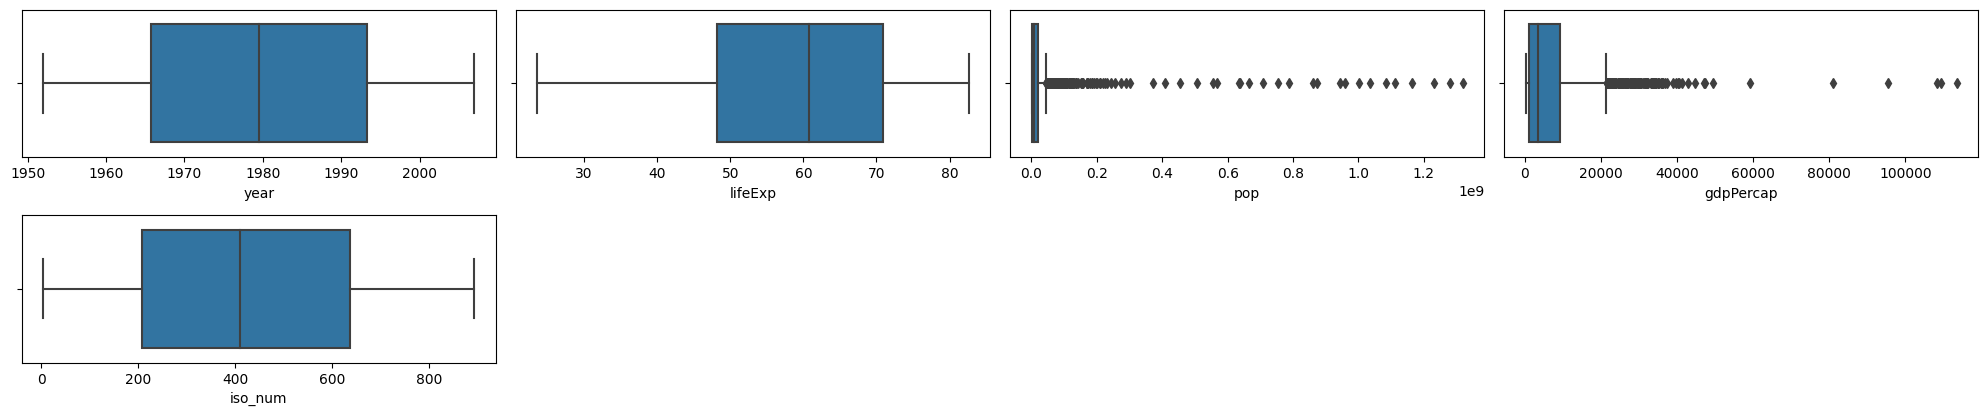

In [ ]:
import seaborn as sns

count = 1

fig = plt.figure(figsize = [20, 10])
cols = gapminder.select_dtypes(exclude=['object']).columns.tolist()

for col in cols:
    plt.subplot(5, 4, count)
    sns.boxplot(x = gapminder[col])
    count += 1
plt.tight_layout()
plt.show()

<ipython-input-8-20673e6aee5f>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gapminder[col], hist_kws=dict(edgecolor="k", linewidth=1, color='blue'), color='red')
<ipython-input-8-20673e6aee5f>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gapminder[col], hist_kws=dict(edgecolor="k", lin

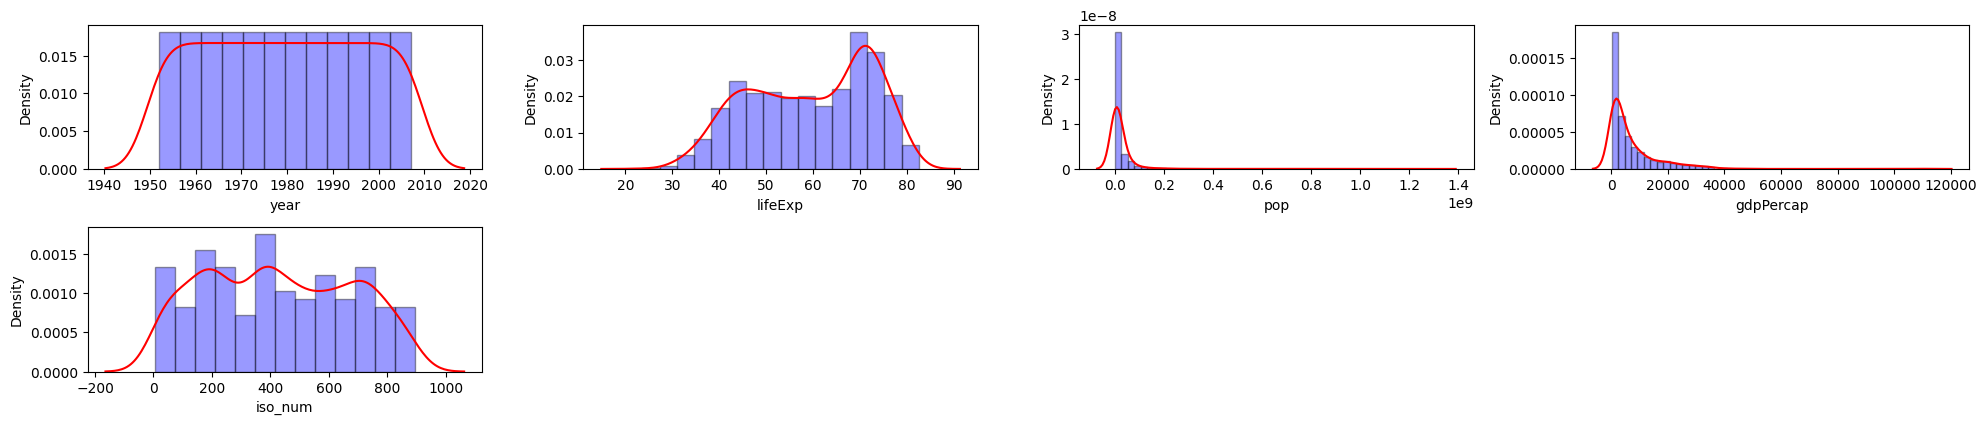

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

count = 1

fig = plt.figure(figsize = [20, 10])
cols = gapminder.select_dtypes(exclude=['object']).columns.tolist()

for col in cols:
    plt.subplot(5, 4, count)
    sns.distplot(gapminder[col], hist_kws=dict(edgecolor="k", linewidth=1, color='blue'), color='red')
    count += 1
plt.tight_layout()
plt.show()

In [ ]:
target = gapminder[['lifeExp', 'pop', 'gdpPercap']]
features = gapminder[gapminder.columns.difference(['lifeExp', 'pop', 'gdpPercap'])]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(pd.get_dummies(features), target, test_size=0.3)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 4, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [4, 25, 47, 69, 91, 112, 134, 156, 178, 200]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 7 fold cross validation,
# search across 200 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, Y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [4, 25, 47, 69, 91, 112,
                                                         134, 156, 178, 200]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 25,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: ', np.mean(errors))
    print('Accuracy = ',accuracy)

    return accuracy

base_model = RandomForestRegressor()   # n_estimators = 10
base_model.fit( X_test, Y_test)
base_accuracy = evaluate(base_model, X_test, Y_test)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random,  X_test, Y_test)

print('Improvement of ', 100 * (random_accuracy - base_accuracy) / base_accuracy)

Model Performance
Average Error:  lifeExp      1.656499e+00
pop          2.935112e+06
gdpPercap    1.062164e+03
dtype: float64
Accuracy =  lifeExp      96.925846
pop          70.185145
gdpPercap    60.941761
dtype: float64
Model Performance
Average Error:  lifeExp      2.062189e+00
pop          2.776675e+06
gdpPercap    1.189974e+03
dtype: float64
Accuracy =  lifeExp      95.980195
pop          78.370364
gdpPercap    69.479911
dtype: float64
Improvement of  lifeExp      -0.975644
pop          11.662323
gdpPercap    14.010345
dtype: float64


In [ ]:
predictions = best_random.predict(X_test)
predictions

array([[4.45132000e+01, 3.65861224e+06, 1.47861788e+03],
       [7.17324000e+01, 5.05181556e+06, 1.49233825e+04],
       [3.88650000e+01, 5.18167900e+06, 1.58920275e+03],
       ...,
       [7.41016800e+01, 5.47364676e+06, 1.44922848e+04],
       [7.17472000e+01, 6.92688116e+06, 9.44332892e+03],
       [3.98835600e+01, 1.04071242e+07, 1.04226123e+03]])

In [ ]:
Y_test

,lifeExp,pop,gdpPercap
1300,56.480,76595,1532.985254
56,71.868,33958947,9308.418710
679,69.580,10612740,12986.479980
692,78.770,259012,25144.392010
1186,74.712,2990875,7356.031934
...,...,...,...
1064,61.999,1554253,3804.537999
875,71.993,3921278,10461.058680
321,60.660,527982,1173.618235
1477,70.560,5126000,17909.489730


In [ ]:
X_test

,iso_num,year,continent_Africa,continent_Americas,continent_Asia,continent_Europe,continent_Oceania,country_Afghanistan,country_Albania,country_Algeria,...,iso_alpha_TZA,iso_alpha_UGA,iso_alpha_URY,iso_alpha_USA,iso_alpha_VEN,iso_alpha_VNM,iso_alpha_YEM,iso_alpha_ZAF,iso_alpha_ZMB,iso_alpha_ZWE
1561,788,1957,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
521,246,1977,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
914,450,1962,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
519,246,1967,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1417,724,1957,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,72,1952,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1140,578,1952,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
383,191,2007,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1464,752,1952,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x_test_copy = X_test.copy()
x_test_copy

,iso_num,year,continent_Africa,continent_Americas,continent_Asia,continent_Europe,continent_Oceania,country_Afghanistan,country_Albania,country_Algeria,...,iso_alpha_TZA,iso_alpha_UGA,iso_alpha_URY,iso_alpha_USA,iso_alpha_VEN,iso_alpha_VNM,iso_alpha_YEM,iso_alpha_ZAF,iso_alpha_ZMB,iso_alpha_ZWE
1561,788,1957,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
521,246,1977,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
914,450,1962,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
519,246,1967,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1417,724,1957,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,72,1952,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1140,578,1952,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
383,191,2007,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1464,752,1952,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x_test_copy = x_test_copy[['iso_num', 'year']]
x_test_copy


,iso_num,year
1561,788,1957
521,246,1977
914,450,1962
519,246,1967
1417,724,1957
...,...,...
156,72,1952
1140,578,1952
383,191,2007
1464,752,1952


In [ ]:
additional_features = pd.merge(x_test_copy, gapminder, how ='inner', on =['iso_num', 'year'])
#x_test_copy = x_test_copy.reset_index(drop=True)
additional_features = additional_features[['iso_num', 'year', 'iso_alpha']]
additional_features

,iso_num,year,iso_alpha
0,788,1957,TUN
1,246,1977,FIN
2,450,1962,MDG
3,246,1967,FIN
4,724,1957,ESP
...,...,...,...
513,72,1952,BWA
514,578,1952,NOR
515,191,2007,HRV
516,752,1952,SWE


In [ ]:
additional_features = additional_features.drop_duplicates()

In [ ]:
additional_features

,iso_num,year,iso_alpha
0,788,1957,TUN
1,246,1977,FIN
2,450,1962,MDG
3,246,1967,FIN
4,724,1957,ESP
...,...,...,...
513,72,1952,BWA
514,578,1952,NOR
515,191,2007,HRV
516,752,1952,SWE


In [ ]:
additional_features = additional_features.reset_index(drop=True)
additional_features

,iso_num,year,iso_alpha
0,788,1957,TUN
1,246,1977,FIN
2,450,1962,MDG
3,246,1967,FIN
4,724,1957,ESP
...,...,...,...
506,72,1952,BWA
507,578,1952,NOR
508,191,2007,HRV
509,752,1952,SWE


In [ ]:
df = pd.DataFrame(predictions, columns=['lifeExp', 'pop', 'gdpPercap'])
df

,lifeExp,pop,gdpPercap
0,44.51320,3658612.24,1478.617884
1,71.73240,5051815.56,14923.382485
2,38.86500,5181679.00,1589.202750
3,69.00440,4509228.68,9970.286562
4,72.50160,30385799.72,10731.628194
...,...,...,...
507,49.76820,1297481.92,2481.539480
508,71.54256,3261146.12,10139.275413
509,74.10168,5473646.76,14492.284755
510,71.74720,6926881.16,9443.328923


In [ ]:
result = df.copy()
result['iso_num'] = additional_features['iso_num']
result['year'] = additional_features['year']
result['iso_alpha'] = additional_features['iso_alpha']
result = result.sort_values(by = 'year', ascending=True)
result

,lifeExp,pop,gdpPercap,iso_num,year,iso_alpha
160,40.57756,3.929099e+08,639.704832,356.0,1952.0,IND
106,42.16732,2.113251e+07,409.245316,104.0,1952.0,MMR
230,61.34180,2.897326e+06,7559.455787,344.0,1952.0,HKG
483,47.36192,8.264329e+06,940.189396,404.0,1952.0,KEN
366,39.91800,9.012400e+07,858.900271,360.0,1952.0,IDN
...,...,...,...,...,...,...
180,59.41868,1.105404e+08,1261.423944,50.0,2007.0,BGD
216,47.78652,2.202296e+06,9899.617413,72.0,2007.0,BWA
47,74.43956,1.196626e+07,6514.498599,192.0,2007.0,CUB
317,77.27296,2.763064e+08,37957.674088,840.0,2007.0,USA


In [ ]:
result = result[:-1]
result

,lifeExp,pop,gdpPercap,iso_num,year,iso_alpha
160,40.57756,3.929099e+08,639.704832,356.0,1952.0,IND
106,42.16732,2.113251e+07,409.245316,104.0,1952.0,MMR
230,61.34180,2.897326e+06,7559.455787,344.0,1952.0,HKG
483,47.36192,8.264329e+06,940.189396,404.0,1952.0,KEN
366,39.91800,9.012400e+07,858.900271,360.0,1952.0,IDN
...,...,...,...,...,...,...
267,52.41272,1.347259e+07,1283.771874,854.0,2007.0,BFA
273,49.39596,1.171037e+07,2033.083844,624.0,2007.0,GNB
180,59.41868,1.105404e+08,1261.423944,50.0,2007.0,BGD
216,47.78652,2.202296e+06,9899.617413,72.0,2007.0,BWA


In [ ]:
fig = px.choropleth(result,
                    locations="iso_alpha",  # Коды стран
                    color="pop",  # Численность населения
                    hover_name="iso_num",  # Название страны
                    animation_frame="year",  # Анимация по годам
                    projection="natural earth",  # Проекция карты
                    title="Численность населения мира по странам (1952-2007)")

fig.show()

In [ ]:
fig = px.choropleth(result,
                    locations="iso_alpha",  # Коды стран
                    color="lifeExp",  # Численность населения
                    hover_name="iso_num",  # Название страны
                    animation_frame="year",  # Анимация по годам
                    projection="natural earth",  # Проекция карты
                    title="Продолжительность жизни по странам (1952-2007)")

fig.show()

In [ ]:
fig = px.choropleth(result,
                    locations="iso_alpha",  # Коды стран
                    color="gdpPercap",  # Численность населения
                    hover_name="iso_num",  # Название страны
                    animation_frame="year",  # Анимация по годам
                    projection="natural earth",  # Проекция карты
                    title="ВВП по странам (1952-2007)")

fig.show()

# Задание 2.

-  **Используя известные нам методы машинного обучения, спрогнозируйте изменение динамики ряда данных с региональной привязкой, используя найденный Вами датасет в сети Интернет.**

- **Количество элементов ряде данных должно превышать 100. (динамика заболеваний по месяцам за несколько десятилетий, курс валюты и тд, чем больше данных для обучения, тем лучше.)**

- **Визуализируйте прогноз на интерактивной картограмме**


In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
import pandas as pd
import numpy as np
import plotly.express as px

In [57]:
years_of_schooling = pd.read_csv('/content/drive/MyDrive/task10/mean-years-of-schooling-long-run.csv', delimiter=';')

In [58]:
years_of_schooling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7763 entries, 0 to 7762
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Entity                  7763 non-null   object 
 1   Code                    7763 non-null   object 
 2   Year                    7763 non-null   int64  
 3   avg_years_of_schooling  7763 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 242.7+ KB


In [59]:
years_of_schooling['year'] = years_of_schooling['Year']
years_of_schooling['iso_alpha'] = years_of_schooling['Code']
years_of_schooling.head()

,Entity,Code,Year,avg_years_of_schooling,year,iso_alpha
0,Afghanistan,AFG,1870,0.01,1870,AFG
1,Afghanistan,AFG,1875,0.01,1875,AFG
2,Afghanistan,AFG,1880,0.01,1880,AFG
3,Afghanistan,AFG,1885,0.01,1885,AFG
4,Afghanistan,AFG,1890,0.01,1890,AFG


In [60]:
px.choropleth(
    years_of_schooling,  # набор данных
    locations="Code",  # отображение с помощью цвета color
    color="avg_years_of_schooling",  # выбор поля для цвета
    hover_name="Entity",  # hover_field_name
    animation_frame="Year",  # аннотация
    color_continuous_scale=px.colors.sequential.Plasma,  # изменение цвета
    projection="natural earth"  # параметр проекции: глобальная карта
)

In [61]:
years_of_schooling = years_of_schooling[(years_of_schooling['year'] >= 1992) & (years_of_schooling['year'] <= 2007)][['year', 'iso_alpha', 'avg_years_of_schooling']]
years_of_schooling

,year,iso_alpha,avg_years_of_schooling
26,1992,AFG,1.6
27,1993,AFG,1.7
28,1994,AFG,1.8
29,1995,AFG,1.9
30,1996,AFG,1.9
...,...,...,...
7748,2003,ZWE,6.8
7749,2004,ZWE,6.8
7750,2005,ZWE,6.8
7751,2006,ZWE,6.8


In [62]:
gapminder_1 = px.data.gapminder()

In [63]:
united_dataset = gapminder_1.merge(years_of_schooling[years_of_schooling['iso_alpha'].isin(gapminder_1['iso_alpha'].unique())], on=['iso_alpha', 'year'], how='right').sort_values(by=['iso_alpha', 'year']).interpolate()
united_dataset['country'] = united_dataset['iso_alpha'].apply(lambda x: gapminder_1[gapminder_1['iso_alpha']==x].iloc[0]["country"])
united_dataset['continent'] = united_dataset['iso_alpha'].apply(lambda x: gapminder_1[gapminder_1['iso_alpha']==x].iloc[0]["continent"])
united_dataset = united_dataset.drop(columns=['iso_num'])
united_dataset.tail(20)

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,avg_years_of_schooling
2026,Zambia,Africa,2004,40.4694,11055900.6,1151.453000,ZMB,6.2
2027,Zambia,Africa,2005,41.1076,11285945.4,1191.372531,ZMB,6.3
2028,Zambia,Africa,2006,41.7458,11515990.2,1231.292062,ZMB,6.4
2029,Zambia,Africa,2007,42.3840,11746035.0,1271.211593,ZMB,6.4
2030,Zimbabwe,Africa,1992,60.3770,10704340.0,693.420786,ZWE,4.9
2031,Zimbabwe,Africa,1993,57.6634,10844461.6,713.226621,ZWE,5.1
2032,Zimbabwe,Africa,1994,54.9498,10984583.2,733.032455,ZWE,5.3
2033,Zimbabwe,Africa,1995,52.2362,11124704.8,752.838290,ZWE,5.5
2034,Zimbabwe,Africa,1996,49.5226,11264826.4,772.644125,ZWE,5.7
2035,Zimbabwe,Africa,1997,46.8090,11404948.0,792.449960,ZWE,5.9


In [64]:
dataset = united_dataset[["continent", "year", "lifeExp", "pop", "gdpPercap", "iso_alpha", "avg_years_of_schooling"]].copy()

In [65]:
from sklearn.preprocessing import LabelEncoder

iso_encoder = LabelEncoder()
dataset['iso_alpha'] = iso_encoder.fit_transform(dataset['iso_alpha'])
continent_encoder = LabelEncoder()
dataset['continent'] = continent_encoder.fit_transform(dataset['continent'])

In [66]:
X = dataset[["continent", "year", "lifeExp", "pop", "gdpPercap", "iso_alpha"]]
y = dataset['avg_years_of_schooling']

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf_r = RandomForestRegressor(n_estimators=500, random_state=33)
rf_r.fit(X, y)

y_pred = rf_r.predict(X)
print('Accuracy with RandomizedSearchCV : {0:0.4f}'. format(r2_score(y, y_pred)))

Accuracy with RandomizedSearchCV : 0.9975


In [68]:
predict_years = list(range(2008, 2051))

In [69]:
prediction_dataset = pd.DataFrame().reindex_like(X)
prediction_dataset
prediction_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2046 entries, 0 to 2045
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   continent  0 non-null      float64
 1   year       0 non-null      float64
 2   lifeExp    0 non-null      float64
 3   pop        0 non-null      float64
 4   gdpPercap  0 non-null      float64
 5   iso_alpha  0 non-null      float64
dtypes: float64(6)
memory usage: 111.9 KB


In [70]:
countries = dataset["iso_alpha"].unique()
year_growth = 5
for country in countries:
    country_selection = dataset[dataset["iso_alpha"]
                                == country].sort_values('year')
    lifeExp_gorwth = country_selection["lifeExp"] - \
        country_selection["lifeExp"].shift()
    gdpPercap_gorwth = country_selection["gdpPercap"] - \
        country_selection["gdpPercap"].shift()
    pop_gorwth = country_selection["pop"] - \
        country_selection["pop"].shift()

    lifeExp_gorwth_avg = lifeExp_gorwth.mean()
    gdpPercap_gorwth_avg = gdpPercap_gorwth.mean()
    pop_gorwth_avg = pop_gorwth.mean()

    lifeExp = country_selection.tail(1)['lifeExp'].values[0]
    gdpPercap = country_selection.tail(1)['gdpPercap'].values[0]
    continent = country_selection.tail(1)['continent'].values[0]
    pop = country_selection.tail(1)['pop'].values[0]

    for year in predict_years:
        lifeExp += lifeExp_gorwth_avg
        gdpPercap += gdpPercap_gorwth_avg
        pop += pop_gorwth_avg
        new_row = pd.DataFrame({
            'continent': continent,
            'year': year,
            'lifeExp': lifeExp,
            'pop': pop,
            'gdpPercap': gdpPercap,
            'iso_alpha': country,
        }, index=[0])

        prediction_dataset = pd.concat(
            [new_row, prediction_dataset.loc[:]]).reset_index(drop=True)

In [71]:
prediction_dataset = prediction_dataset.dropna().sort_values(['iso_alpha', 'year'])
prediction_dataset['year'] = prediction_dataset['year'].apply(np.int64)
prediction_dataset['continent'] = prediction_dataset['continent'].apply(np.int64)
prediction_dataset['iso_alpha'] = prediction_dataset['iso_alpha'].apply(np.int64)
prediction_dataset.head(20)

,continent,year,lifeExp,pop,gdpPercap,iso_alpha
5933,2,2008,43.9716,3.292806e+07,996.262935,0
5932,2,2009,44.1152,3.396619e+07,1017.945531,0
5931,2,2010,44.2588,3.500432e+07,1039.628127,0
5930,2,2011,44.4024,3.604246e+07,1061.310723,0
5929,2,2012,44.5460,3.708059e+07,1082.993319,0
5928,2,2013,44.6896,3.811872e+07,1104.675916,0
5927,2,2014,44.8332,3.915686e+07,1126.358512,0
5926,2,2015,44.9768,4.019499e+07,1148.041108,0
5925,2,2016,45.1204,4.123312e+07,1169.723704,0
5924,2,2017,45.2640,4.227126e+07,1191.406301,0


In [72]:
pred_schooling = rf_r.predict(prediction_dataset)

In [73]:
predicted_map = prediction_dataset.copy()

In [74]:
predicted_map['avg_years_of_schooling'] = pred_schooling
predicted_map['iso_alpha'] = iso_encoder.inverse_transform(prediction_dataset['iso_alpha'].astype('int64'))
predicted_map['continent'] = continent_encoder.inverse_transform(prediction_dataset['continent'].astype('int64'))

In [76]:
def iso_to_country_converter(row):
    return gapminder_1[gapminder_1['iso_alpha'] == row].iloc[0]["country"]
predicted_map["country"] = predicted_map['iso_alpha'].apply(iso_to_country_converter)

In [77]:
output_map = pd.concat([united_dataset, predicted_map])
output_map[output_map["iso_alpha"]=='AFG'].sort_values(['iso_alpha', 'year'])

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,avg_years_of_schooling
0,Afghanistan,Asia,1992,41.6740,1.631792e+07,649.341395,AFG,1.6000
1,Afghanistan,Asia,1993,41.6918,1.749982e+07,646.541386,AFG,1.7000
2,Afghanistan,Asia,1994,41.7096,1.868172e+07,643.741378,AFG,1.8000
3,Afghanistan,Asia,1995,41.7274,1.986362e+07,640.941369,AFG,1.9000
4,Afghanistan,Asia,1996,41.7452,2.104552e+07,638.141360,AFG,1.9000
5,Afghanistan,Asia,1997,41.7630,2.222742e+07,635.341351,AFG,2.0000
6,Afghanistan,Asia,1998,41.8362,2.283561e+07,653.619892,AFG,2.0000
7,Afghanistan,Asia,1999,41.9094,2.344381e+07,671.898433,AFG,2.1000
8,Afghanistan,Asia,2000,41.9826,2.405201e+07,690.176973,AFG,2.2000
9,Afghanistan,Asia,2001,42.0558,2.466021e+07,708.455514,AFG,2.2000


In [78]:
px.choropleth(
    output_map,  # набор данных
    locations="iso_alpha",  # отображение с помощью цвета color
    color="avg_years_of_schooling",  # выбор поля для цвета
    hover_name="country",  # hover_field_name
    animation_frame="year",  # аннотация
    color_continuous_scale=px.colors.sequential.Plasma,  # изменение цвета
    projection="natural earth"  # параметр проекции: глобальная карта
)